<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EA%B0%9C%EC%A0%952%ED%8C%90_ch8_6%2C_8~9_p_534_538%2C_550_565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling) — 20 뉴스그룹

### 토픽 모델링(Topic Modeling) 개요  
- 문서 집합에서 숨겨진 주제를 효과적으로 찾아내는 기법
- 사람이 문서를 읽고 핵심 주제를 찾는 대신, 머신러닝 기반 방법론을 활용하여 주요 단어를 추출.  

### 주요 기법  
- **LSA (Latent Semantic Analysis)**  
- **LDA (Latent Dirichlet Allocation)**  

> ⚠ LDA에는 **Latent Dirichlet Allocation**과 **Linear Discriminant Analysis**가 있으며, 서로 다른 알고리즘이므로 구분이 필요  

### 데이터셋  
- **20 뉴스그룹(20 Newsgroups) 데이터**  
  - 20가지 주제 중 **8개 주제(모터사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학)**를 선택하여 분석  

### 사이킷런을 이용한 LDA 토픽 모델링  
- `LatentDirichletAllocation` 클래스 제공  
- `fetch_20newsgroups(categories=…)`로 특정 주제만 필터링  
- **Count 기반 벡터화 사용** (`max_features=1000`, `ngram_range=(1,2)`)  


In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출.
# featch_20newsgroups( )의 categories 파라미터에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용함.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행
- 토픽의 개수 : 8개

In [39]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- components_의 형태와 속성값 확인

In [40]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

### LDA 모델의 `components_` 설명  
- `components_`는 **(8, 1000) 크기의 배열**로 구성됨  
- **8개의 토픽별로 1000개의 단어(feature)**가 각 토픽과의 연관도 값을 가짐  
- 예를 들어, `components_[0, 10]`은 **Topic #0**에서 **10번째 단어의 연관도 값**을 의미  

### 토픽별 주요 단어 추출  
- `lda_model.components_` 값만으로는 **각 토픽별 단어 연관도를 직접 해석하기 어려움**  
- 이를 해결하기 위해 `display_topics()` 함수를 생성하여 **각 토픽별 연관도가 높은 단어를 정렬**하여 표시  


In [41]:
# display_topics( ) 함수 -> 각 토픽별로 연관도가 높은 순으로 Word 나열

def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


### LDA 토픽 모델링 결과 분석  

- **Topic #0**: 주로 **의학 관련 주제어**가 추출됨  
- **Topic #1**: 명확하지 않으며 **일반적인 단어**가 많음  
- **Topic #2**: **컴퓨터 그래픽스** 관련 주제어 포함  
- **Topic #3**: 일반적인 단어로 구성되어 **주제가 불명확**  
- **Topic #4**: **중동(Middle East) 관련 주제어**가 명확히 추출됨  
- **Topic #5**: 일부 **컴퓨터 그래픽스** 단어 포함, 하지만 명확한 주제 매핑 어려움  
- **Topic #6**: **기독교 관련 주제어**가 명확히 추출됨  
- **Topic #7**: **윈도우 운영체제** 관련 주제어 포함  

### 주요 문제점  
- **Topic #1, #3, #5**는 **일반적인 단어가 많아 주제가 불분명**  
- **모터사이클, 야구 관련 주제어가 명확히 추출되지 않음**  


## 문서 유사도

## 문서 유사도 측정 - 코사인 유사도  

- **코사인 유사도(Cosine Similarity)**는 문서 간 유사도 비교에 사용됨  
- 벡터의 **크기보다 방향성을 비교**하여 유사도를 측정  
- 두 벡터 사이의 **사잇각을 이용해 유사도를 수치화**

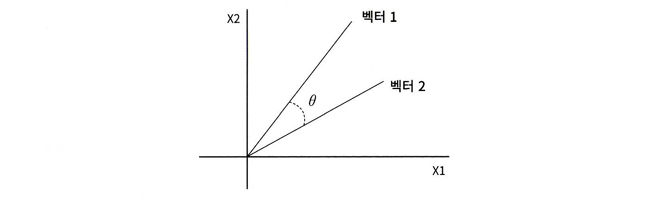

## 두 벡터의 사잇각과 코사인 유사도  

- **두 벡터의 코사인 유사도**는 벡터의 방향성을 비교하여 유사도를 측정  
- 두 벡터 $\mathbf{A}$, $\mathbf{B}$의 내적은 다음과 같음  

  $$
  \mathbf{A} \cdot \mathbf{B} = ||\mathbf{A}|| ||\mathbf{B}|| \cos\theta
  $$

- 코사인 유사도는 내적을 벡터 크기로 정규화한 값  

$$
\text{similarity} = \cos\theta = \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}|| ||\mathbf{B}||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

- **분자**: 두 벡터의 내적 $ \sum_{i=1}^{n} A_i B_i $  
- **분모**: 각 벡터의 크기(유클리드 노름)  
  - $ ||\mathbf{A}|| = \sqrt{\sum_{i=1}^{n} A_i^2} $  
  - $ ||\mathbf{B}|| = \sqrt{\sum_{i=1}^{n} B_i^2} $  

## 문서 유사도 측정에서 코사인 유사도 활용 이유  
1. **희소 행렬(Sparse Matrix)에서 효과적**  
   - 문서를 벡터화하면 차원이 매우 크고 희소한 형태가 됨  
   - 유클리드 거리 기반 지표보다 **코사인 유사도가 정확도 면에서 유리**  

2. **문서 길이에 영향을 받지 않음**  
   - 단어 빈도수만으로 유사도를 비교하면 문서 길이에 따라 왜곡 가능  
   - 코사인 유사도는 **단어 빈도의 상대적 비율을 고려**하여 공정한 비교 가능  


- 간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구하는 코드

In [42]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

- dot_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


### 문서 유사도 측정 과정

1. **희소 행렬(Sparse Matrix) → 밀집 행렬(Dense Matrix) 변환**  
2. 각 문서를 배열로 변환 (`feature_vect_dense[0]`, `feature_vect_dense[1]`)  
3. `cos_similarity()` 함수를 사용하여 두 문서 간 유사도 계산  


In [44]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


- 첫 번째 문장과 세 번째 문장,
그리고 두 번째 문장과 세 번째 문장의 유사도도 측정

In [45]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


### 사이킷런의 코사인 유사도 측정  
- `sklearn.metrics.pairwise.cosine_similarity()`를 사용하여 문서 유사도 계산  
- 첫 번째 파라미터: 기준 문서의 피처 행렬  
- 두 번째 파라미터: 비교할 문서의 피처 행렬  
- 희소 행렬과 밀집 행렬 모두 지원하며, 별도 변환 없이 사용 가능  
- 첫 번째 문서와 나머지 문서들의 유사도를 측정  

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


### 유사도 결과 해석  
- **1.0** → 첫 번째 문서와 자기 자신과의 유사도  
- **0.40207758** → 첫 번째 문서와 두 번째 문서의 유사도  
- **0.40425045** → 첫 번째 문서와 세 번째 문서의 유사도  
- 기준 문서를 제외하려면 `feature_vect[1:]`을 사용하여 비교  


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


### 모든 문서 간 코사인 유사도 계산  
- `cosine_similarity()`는 **쌍(pair) 단위**로 유사도를 계산  
- 각 문서 간의 유사도를 **ndarray 형태**로 반환  
- 예)  
  - 1번째 문서 ↔ 2, 3번째 문서  
  - 2번째 문서 ↔ 1, 3번째 문서  
  - 3번째 문서 ↔ 1, 2번째 문서  

In [48]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## Opinion Review 데이터 세트를 이용한 문서 유사도 측정

- Opinion Review 데이터 세트를 이용해 이들 문서 간의 유사도를 측정

In [104]:
import pandas as pd
import glob, os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 필수 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('wordnet')

# 데이터 파일 경로 설정
path = r'/content/drive/My Drive/25-1 ESAA OB/OpinosisDataset1.0/topics'

# 모든 .data 파일 가져오기
# ✅ 모든 .data 파일 경로 가져오기
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

# ✅ 파일 반복해서 불러오기
for file_ in all_files:
    with open(file_, encoding='latin1') as f:
        text = f.read()
        opinion_text.append(text)

    filename = os.path.basename(file_).split('.')[0]
    filename_list.append(filename)

# ✅ DataFrame 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

# 텍스트 정규화 및 토큰화
def LemNormalize(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)  # nltk 토큰화 적용
    return [wordnet_lemmatizer.lemmatize(word) for word in words]


# 빈 문서 제거
document_df = document_df.dropna(subset=['opinion_text'])

# Ensure the 'opinion_text' column contains strings
document_df['opinion_text'] = document_df['opinion_text'].astype(str)

document_df = document_df[document_df['opinion_text'].str.len() > 0]

# TF-IDF 벡터화 (stop_words 제거, min_df 완화)
tfidf_vect = TfidfVectorizer(tokenizer=None, preprocessor=None,
                             ngram_range=(1,2), min_df=0.01, max_df=0.95)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


# KMeans 클러스터링
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0, n_init='auto')
km_cluster.fit(feature_vect)

# 클러스터 결과 저장
document_df['cluster_label'] = km_cluster.labels_

# 희소 행렬 변환 후 cluster_centers_ 접근
cluster_centers = km_cluster.cluster_centers_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1️⃣ 호텔 군집화된 문서만 추출

2️⃣ 기존 TF-IDF 벡터화된 데이터에서 호텔 문서의 벡터만 선택

3️⃣ Cosine Similarity 계산 → 문서 간 유사도 비교

In [105]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 2].index
print('호텔로 클러스터링된 문서들의 Dataframe Index',hotel_indexes)

호텔로 클러스터링된 문서들의 Dataframe Index Index([0, 3, 12, 13, 15, 17, 23, 24, 26, 29, 32, 33, 37, 40, 48], dtype='int64')


In [106]:
# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('#### 비교 기준 문서명:', comparison_docname, '와 타 문서 유사도 ####')

#### 비교 기준 문서명: staff_bestwestern_hotel_sfo 와 타 문서 유사도 ####


In [107]:
''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정. '''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

[[1.         0.01980255 0.22439353 0.20228928 0.01287639 0.27781149
  0.16051259 0.08800145 0.01501632 0.12110374 0.23414442 0.01290684
  0.03751251 0.04380178 0.88301136]]


단순 숫자 비교로는 직관적으로 이해하기 어려우므로,
유사도가 높은 순으로 정렬 & 시각화

가장 유사도가 큰 파일명 및 유사도:
 filename      staff_swissotel_chicago
similarity                   0.883011
Name: 48, dtype: object


Text(0.5, 1.0, 'staff_bestwestern_hotel_sfo')

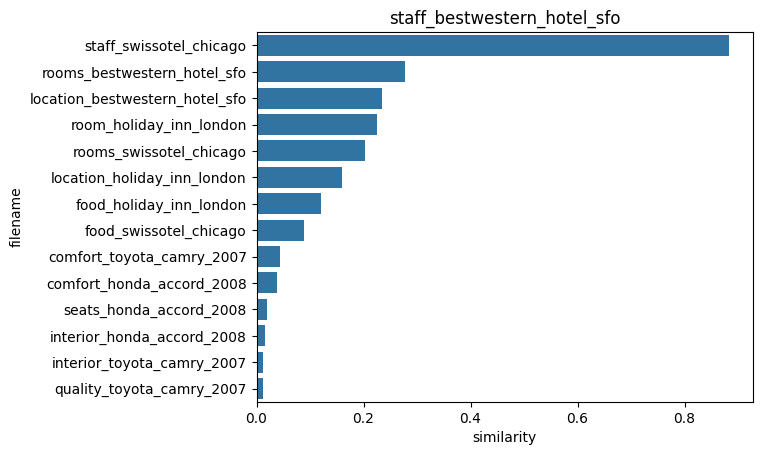

In [108]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 수능로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

## 09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

## 한글 NLP 처리의 어려움

✅ 1. 띄어쓰기 문제

띄어쓰기에 따라 의미가 왜곡될 가능성 높음

- 예: "아버지가 방에 들어가신다" → "아버지 가방에 들어가신다"

- 영어는 띄어쓰기 실수가 단어 분석에서 제외되는 수준

- 예: "My father enters a room" → "My fatherenters a room" (오타로 인식)

- 한글 띄어쓰기 규칙이 복잡 → 고등교육을 받은 사람도 종종 실수

✅ 2. 조사(어미) 문제

조사의 종류가 많아 어근 추출(Stemming)이 어려움

- 예: 집 → 집은, 집이, 집으로, 집에서, 집에 …

- 조사가 단어인지, 다른 의미(예: ‘은’ → 은(銀))인지 구별이 어려움

- 띄어쓰기 오류가 있을 경우 의미 파악이 더욱 힘들어짐

## KoNLPy 소개
: 파이썬에서 사용할 수 있는 대표적인 한글 형태소 분석(Morphological Analysis) 패키지

In [109]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 24.0 MB/s eta 0:00:00


In [113]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/25-1 ESAA OB/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [114]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


- 레이블(0:부정 과 1:긍정)의 비율이 균등함 → 데이터 불균형 문제 없음

- 결측치 처리: document 칼럼의 Null 값 → 공백으로 변환

- 숫자 제거: 정규 표현식(re 모듈 사용) → 공백으로 변환

- 테스트 데이터도 동일한 방식으로 전처리

In [116]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', '', x))

test_df = pd.read_csv('/content/drive/MyDrive/25-1 ESAA OB/ratings_test.txt', sep='\t', encoding='utf-8')
test_df = test_df.fillna('')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', '', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- 형태소 분석: SNS 분석에 적합한 Twitter 클래스 사용

- 토큰화: Twitter.morphs() → 문장을 형태소 단어 리스트로 변환

- 토크나이저 함수 생성: tw_tokenizer() → TfidfVectorizer의 tokenizer로 활용

In [117]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [119]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8591


In [120]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86196
